In [26]:
import os
import tomllib
from functools import partial
from pprint import pprint
from random import randint

import matplotlib.pyplot as plt
import PIL
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

from util import *

In [25]:
with open('parameters.toml', 'r') as f:
    parameters = tomllib.loads(f.read())
    
pprint(parameters)

{'TRAINING': {'batch_size': 32,
              'diseased_skin_path': './dataset/diseased/',
              'healthy_skin_path': './dataset/healthy/',
              'num_workers': 4,
              'pin_memory': True,
              'precision_threshold': 0.9,
              'shuffle': True,
              'training_dataset_ratio': 0.8}}


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# base_dataset = {'training': list(), 'validation': list(), 'testing': list()}

# raw_healthy_images = read_images(parameters['TRAINING']['healthy_skin_path'])
# raw_diseased_images = read_images(parameters['TRAINING']['diseased_skin_path'])

# total_raw_images = raw_healthy_images + raw_diseased_images

# random.shuffle(total_raw_images)

# for i, image in enumerate(total_raw_images):
#     training_ratio = parameters['TRAINING']['training_dataset_ratio']

#     if i < len(total_raw_images) * training_ratio:
#         base_dataset['training'].append(image)
#     elif i < len(total_raw_images) * round((1 + training_ratio) / 2, 1):
#         base_dataset['validation'].append(image)
#     else:
#         base_dataset['testing'].append(image)
        
# print(f"Total dataset: {len(total_raw_images)} items.\n")
# print(f"Training: {len(base_dataset['training'])} items.")
# print(f"Validation: {len(base_dataset['validation'])} items.")
# print(f"Testing: {len(base_dataset['testing'])} items.")

In [22]:
training_ratio = parameters['TRAINING']['training_dataset_ratio']
validation_ratio = testing_ratio = round(1 - round((1 + training_ratio) / 2, 1), 1)

print(f'Training ratio: {training_ratio*100}%')
print(f'Validation ratio: {validation_ratio*100}%')
print(f'Testing ratio: {testing_ratio*100}%')

seed = randint(0, 1000)
print(f'\nSeed: {seed}')


Training ratio: 80.0%
Validation ratio: 10.0%
Testing ratio: 10.0%

Seed: 229


In [6]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

criterion = nn.BCELoss().to(device)

loader_kwargs = {'batch_size': 32, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

train_dataset, validate_dataset, test_dataset = get_datasets(SkinDiseaseDataset, training_ratio, validation_ratio, testing_ratio, seed, root_dir='dataset', transform=transform)

train_loader = DataLoader(train_dataset, **loader_kwargs)
validate_loader = DataLoader(validate_dataset, **loader_kwargs)
test_loader = DataLoader(test_dataset, **loader_kwargs)

train_cnn = partial(train_model, train_loader=train_loader, criterion=criterion, device=device)

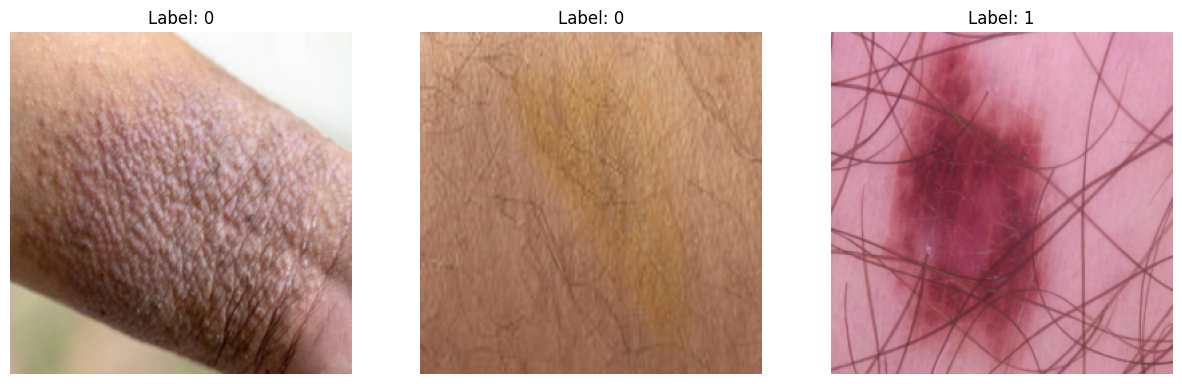

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Sample images from the training dataset')

for i, (image, label) in enumerate(train_loader):
    ax[i].imshow(image[0].permute(1, 2, 0))
    ax[i].set_title(f'Label: {label[0]}')
    ax[i].axis('off')
    if i == 2:
        break

plt.show()

## Model 1: Images with no pre-processing

In [ ]:
model = BinaryCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_cnn(model=model, optimizer=optimizer)